File found at D:\Users\sf22\Documents\Flightdelay.csv
DATASET PREVIEW:
    year  month carrier       carrier_name airport  \
0  2023      8      9E  Endeavor Air Inc.     ABE   
1  2023      8      9E  Endeavor Air Inc.     ABY   
2  2023      8      9E  Endeavor Air Inc.     AEX   
3  2023      8      9E  Endeavor Air Inc.     AGS   
4  2023      8      9E  Endeavor Air Inc.     ALB   

                                        airport_name  arr_flights  arr_del15  \
0  Allentown/Bethlehem/Easton, PA: Lehigh Valley ...         89.0       13.0   
1             Albany, GA: Southwest Georgia Regional         62.0       10.0   
2           Alexandria, LA: Alexandria International         62.0       10.0   
3        Augusta, GA: Augusta Regional at Bush Field         66.0       12.0   
4                   Albany, NY: Albany International         92.0       22.0   

   carrier_ct  weather_ct  ...  security_ct  late_aircraft_ct  arr_cancelled  \
0        2.25        1.60  ...          0.0     

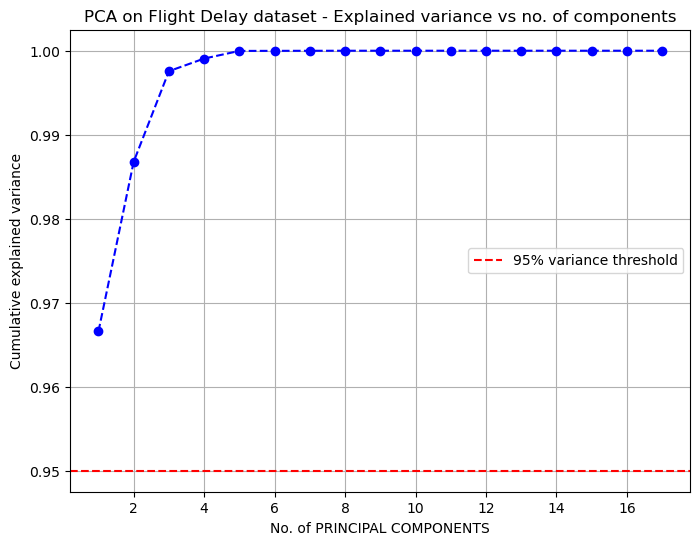


(C) keeping 1 components as they explain approx 95% of variance.


(D) Selected features based on PCA ANALYSIS :
 ['arr_delay']


In [40]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

file_path=r"D:\Users\sf22\Documents\Flightdelay.csv"

if not os.path.exists(file_path):
    raise FileNotFoundError(f"Error:file not found in {file_path}")
print(f"File found at {file_path}")
    
df=pd.read_csv(file_path)

print("DATASET PREVIEW:\n", df.head())
#drop non-numeric cols(if exists)
df_numeric=df.select_dtypes(include=[np.number])

if df_numeric.empty:
    raise ValueError("Error: No numeric cols found in dataset. PCA requires numeric data")
df_numeric=df_numeric.apply(lambda col: col.fillna(col.mean()),axis=0)
if df_numeric.isnull().sum().sum()>0:
    raise ValueError("Error:SomeNaN values stillexist after handling.Please check dataset")
pca=PCA()
X_pca=pca.fit_transform(df_numeric)
num_components=pca.n_components_
print(f"\n(A) PCA generated {num_components} components.\n")
feature_weights=pd.DataFrame(pca.components_,columns=df_numeric.columns,index=[f'PC{i+1}' for i in range (num_components)])
print(f"\n(B) Feature weights Table (Principal Component Loadings):\n",feature_weights)
        
explained_variance_ratio=pca.explained_variance_ratio_
cumulative_variance=np.cumsum(explained_variance_ratio)
        
        #Plot pca results
plt.figure(figsize=(8,6))
plt.plot(range(1,num_components+1),cumulative_variance,marker='o',linestyle='--', color='b')
plt.xlabel("No. of PRINCIPAL COMPONENTS")
plt.ylabel("Cumulative explained variance")
plt.title("PCA on Flight Delay dataset - Explained variance vs no. of components")
plt.axhline(y=0.95, color='r',linestyle='--',label="95% variance threshold")
plt.legend()
plt.grid(True)
plt.show()
    
num_selected_components=np.argmax(cumulative_variance>=0.95)+1
print(f"\n(C) keeping {num_selected_components} components as they explain approx 95% of variance.\n")
    
top_features= feature_weights.iloc[:num_selected_components].abs().mean().sort_values(ascending=False)
selected_features=top_features.index[:num_selected_components]
print("\n(D) Selected features based on PCA ANALYSIS :\n",selected_features.tolist())